In [6]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as pp
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import math
from scipy.stats.stats import pearsonr


data = pd.read_csv('/Users/mayurjain/Documents/Fragma ML TEST/marketing-data.csv',sep=',',header='infer')

def binaryType_(data):
    
    data.is_success.replace(('yes', 'no'), (1, 0), inplace=True)
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.loan.replace(('yes','no'),(1,0),inplace=True)
    return data

data = binaryType_(data)

print(np.corrcoef(data['campaign'],data['is_success']))
print(np.corrcoef(data['pdays'],data['is_success']))
print(np.corrcoef(data['duration'],data['is_success']))
print(np.corrcoef(data['age'],data['is_success']))
print(np.corrcoef(data['default'],data['is_success']))
print(np.corrcoef(data['housing'],data['is_success']))
print(np.corrcoef(data['loan'],data['is_success']))

#print(data.education.unique())
#print(data.education.value_counts())
# sec = (data.education.value_counts()[0]/ len(data.education) * 100).tolist()
# pri = (data.education.value_counts()[1]/ len(data.education) * 100).tolist()
# teri = (data.education.value_counts()[2]/ len(data.education) * 100).tolist()
# tot = sec + pri + teri
# sec_unk = math.ceil((sec/tot) * 100)
# pri_unk = math.ceil((pri/tot) * 100)
# teri_unk = math.ceil((teri/tot) * 100) -1
# unk_sec = math.ceil((data.education.value_counts()[3] * sec_unk) / 100 )
# unk_pri = math.ceil((data.education.value_counts()[3] * pri_unk) / 100 )
# unk_teri = math.ceil((data.education.value_counts()[3] * teri_unk) / 100 ) -1 

# for i in range(data.education.value_counts()[3]):
#     for j in range(len(data['education'])):
#         if i != unk_sec:
#             if data['education'][j] == 'unknown':
#                 data['education'][j] = 'secondary'
#         elif i != unk_sec+unk_pri:
#             if data['education'][j] == 'unknown':
#                 data['education'][j] = 'primary'
#         elif i != unk_sec+unk_pri+unk_teri:
#             if data['education'][j] == 'unknown':
#                 data['education'][j] = 'tertiary'
#         else:
#             break
            

#data.loc(data['education'][i].replace(('unknown'), ('secondary'), inplace=True) for i in range(unk_sec) if data['education'] == 'unknown') 
#print(data.columns)
#print(data.marital.unique())
#print(data[['marital', 'is_success']].groupby(['marital'], as_index=False).mean())
for i in range(len(data.marital.unique())):
    data["marital_"+str(data.marital.unique()[i])] = (data.marital == data.marital.unique()[i]).astype(int)

for j in range(len(data.job.unique())):
    data["job_"+str(data.job.unique()[j])] = (data.job == data.job.unique()[j]).astype(int)

for k in range(len(data.contact.unique())):
    data["contact_"+str(data.contact.unique()[k])] = (data.contact == data.contact.unique()[k]).astype(int)

for l in range(len(data.education.unique())):
    data['education_'+str(data.education.unique()[l])] = (data.education == data.education.unique()[l]).astype(int)
    
#for m in range(len(data.poutcome.unique())):
#    data['poutcome_'+str(data.poutcome.unique()[m])] = (data.poutcome == data.poutcome.unique()[m]).astype(int)

data = data.drop(['education'],axis=1)
data = data.drop(['marital'],axis=1)
data = data.drop(['job'],axis=1)
data = data.drop(['contact'],axis=1)
data = data.drop(['poutcome'],axis=1)

#print(data.columns)
#print(data.age.value_counts())
#print(data.campaign.value_counts())

[[ 1.         -0.07317201]
 [-0.07317201  1.        ]]
[[ 1.          0.10362149]
 [ 0.10362149  1.        ]]
[[ 1.          0.39452102]
 [ 0.39452102  1.        ]]
[[ 1.          0.02515502]
 [ 0.02515502  1.        ]]
[[ 1.         -0.02241897]
 [-0.02241897  1.        ]]
[[ 1.        -0.1391727]
 [-0.1391727  1.       ]]
[[ 1.         -0.06818503]
 [-0.06818503  1.        ]]


In [7]:
#data = data.drop(['poutcome'],axis=1)
from sklearn.neighbors import KNeighborsClassifier

#eclf1 = VotingClassifier(estimators=[('knn', knn)], voting='soft', weights=[2])

def age_(data):
    
    for x in range(len(data['age'])):
        if data['age'][i] <= 28:
            if data['age'][i] >= 18:
                data['age'][i] = 1
        elif data['age'][i] <= 39:
            if data['age'][i] >= 29:
                data['age'][i] = 2
        elif data['age'][i] <=49:
            if data['age'][i] >=40:
                data['age'][i] = 3
        else:
            data['age'][i]=4
    
    return data

def pdays_(data):

    for i in range(len(data['pdays'])):
        if data['pdays'][i] < 100:
            if data['pdays'][i] > 0:
                data['pdays'][i] = 1
        elif data['pdays'][i] < 300:
            if data['pdays'][i] > 99:
                data['pdays'][i] = 2
        elif data['pdays'][i] > 299:
            data['pdays'][i] = 3
        else:
            data['pdays'][i] = 4
            
    return data



def balance_(data):
    
    data.loc[(data['balance'] < 30000) & (data['balance'] >= 0 ), 'balance'] = 4
    data.loc[data['balance'] > 29999,'balance'] = 5
    data.loc[data['balance'] < -8000, 'balance'] = 1
    data.loc[(data['balance'] < -250) & (data['balance'] > -8000), 'balance'] = 2
    data.loc[(data['balance'] < 0) & (data['balance'] > -251), 'balance'] = 3
    data['balance'] = data['balance'].astype(int)
    return data
    

    
data = pdays_(data)

data = balance_(data)
data = age_(data)


#print(data[['education', 'is_success']].groupby(['education'], as_index=False).mean())
#print(data.education.unique())
#print(data.columns)
#print(data[['housing', 'is_success']].groupby(['housing'], as_index=False).mean())
#print(data[['loan', 'is_success']].groupby(['loan'], as_index=False).mean())
#print(data[['job', 'is_success']].groupby(['job'], as_index=False).mean())
# print(data[['pdays', 'is_success']].groupby(['pdays'], as_index=False).mean())
# print(data[['previous', 'is_success']].groupby(['previous'], as_index=False).mean())
# print(data[['poutcome', 'is_success']].groupby(['poutcome'], as_index=False).mean())
# print(data[['campaign', 'is_success']].groupby(['campaign'], as_index=False).mean())
# from sklearn import preprocessing
# LEncoder = preprocessing.LabelEncoder()
# LEncoder.fit(['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'])
# data['job'] = LEncoder.transform(data['job'])
#print(data['job'])





# clf = svm.SVC(kernel='rbf', C=1,gamma=1)
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)

# print(accuracy_score(y_test,y_pred))

/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


-1    36954
 2     4353
 3     2497
 1     1407
Name: pdays, dtype: int64
0.777175716023
0.857237642375


/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:94: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.877916620591


/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.872719230344


/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.892071215305
0.886542076744


In [11]:
def campaign_(data):
    
    for i in range(len(data['campaign'])):
        #print(data['campaign'][i])
        if data['campaign'][i] == 1:
            data['campaign'][i] = 1
            
        elif data['campaign'][i] >=2:
            if data['campaign'][i] <=3:
                data['campaign'][i] = 2

        else:
            data['campaign'][i] = 3
    
    
    return data

data = campaign_(data)

data_X = data.drop(['is_success','day','month'],axis=1)
data_y = pd.DataFrame(data['is_success'])
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,test_size=0.2,random_state=0)

modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
y_pred = modelGNB.predict(X_test)

print(accuracy_score(y_test,y_pred))

modelMNB = BernoulliNB()
modelMNB.fit(X_train, y_train)
y_pred = modelMNB.predict(X_test)

print(accuracy_score(y_test,y_pred))

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print(accuracy_score(y_test,y_predict))

rforest = RandomForestClassifier()
rforest = rforest.fit(X_train,y_train)
yprediction = rforest.predict(X_test)

print(accuracy_score(yprediction,y_test))

gbc = GradientBoostingClassifier()
gbc =gbc.fit(X_train,y_train)
y_out = gbc.predict(X_test)
print(accuracy_score(y_out,y_test))

abc = AdaBoostClassifier()
abc =abc.fit(X_train,y_train)
y_output = abc.predict(X_test)
print(accuracy_score(y_output,y_test))

/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:35: DataConversionWarning: A c

0.786575251576
0.857237642375
0.877916620591


/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.870839323233


/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.892071215305
0.886542076744


In [135]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=11,shuffle=True,random_state=42)
trainX = data_X.iloc[:40000,:]
trainy = data_y.iloc[:40000,:]
global xtrain,ytrain,xvalid, yvalid
for train,valid in kf.split(trainX):
    xtrain, ytrain = trainX.iloc[train], trainy.iloc[train]
    xvalid, yvalid = trainX.iloc[valid], trainy.iloc[valid]
    GNB = GaussianNB()
    BNB = BernoulliNB()
    GNB = GNB.fit(xtrain, ytrain)
    pred = GNB.predict(xtrain)
    y_pred = GNB.predict(xvalid)
    print(accuracy_score(yvalid,y_pred))
    print(accuracy_score(ytrain,pred))
    print("_____________________________")

/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.911190541655
0.911778456123
_____________________________
0.914215012373
0.907763385859
_____________________________
0.911190541655
0.910733437835
_____________________________
0.904041792686
0.906223358909
_____________________________
0.909240924092
0.907518424816
_____________________________
0.898239823982
0.905923440766
_____________________________
0.913641364136
0.911945880541
_____________________________
0.895764576458
0.90380596194
_____________________________
0.905665566557
0.907545924541
_____________________________
0.913916391639
0.908975910241
_____________________________
0.913641364136
0.911175888241
_____________________________


In [136]:
testX = data_X.iloc[40000:,:]
testy = data_y.iloc[40000:,:]
predict_Y = GNB.predict(testX)
print(accuracy_score(predict_Y,testy))

0.554212243331


In [137]:
BNB = BNB.fit(xtrain,ytrain)
predict_Y = BNB.predict(testX)
print(accuracy_score(predict_Y,testy))

0.540395317597


/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
svmcc = svm.SVC(kernel='sigmoid',C=1,gamma=1)
svmcc = svmcc.fit(xtrain,ytrain)
predY = svmcc.predict(testX)
print(accuracy_score(predY,testy))

/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.54077912109


In [138]:
rforest = RandomForestClassifier()
rforest = rforest.fit(xtrain,ytrain)
yprediction = rforest.predict(testX)
print(accuracy_score(yprediction,testy))

/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.551525618883


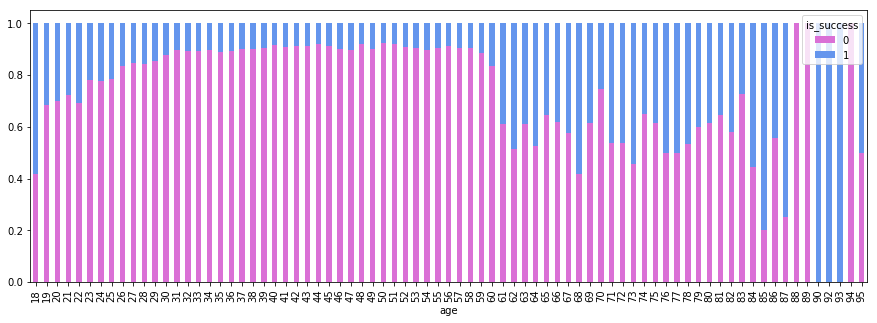

In [70]:
draw_data = pd.crosstab(data.age, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orchid','cornflowerblue'],grid=False, figsize=(15, 5))
pp.show()

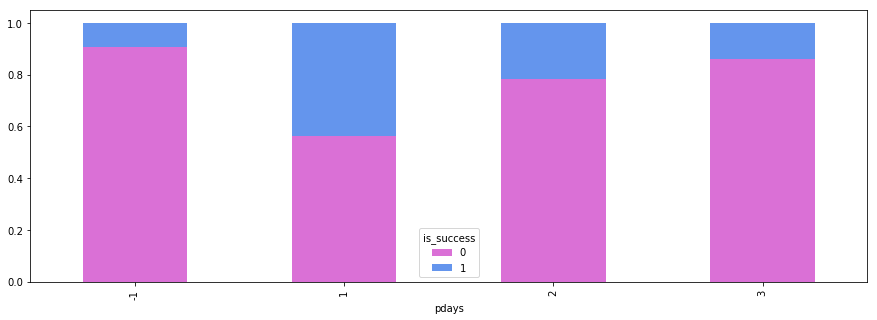

In [12]:
draw_data = pd.crosstab(data.pdays, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orchid','cornflowerblue'],grid=False, figsize=(15, 5))
pp.show()

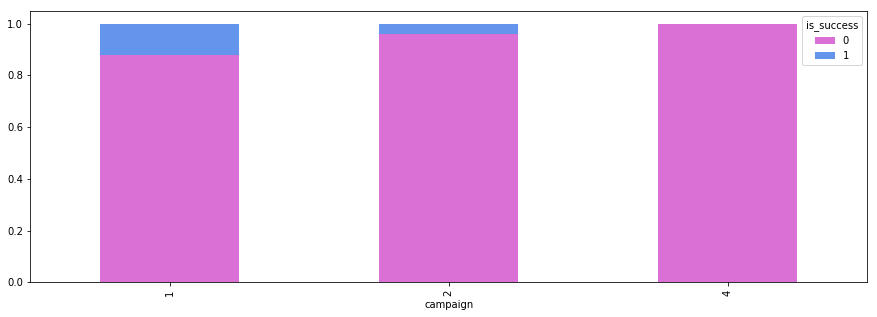

In [13]:
draw_data = pd.crosstab(data.campaign, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orchid','cornflowerblue'],grid=False, figsize=(15, 5))
pp.show()

In [14]:
print(data['campaign'].value_counts())

1    43749
2     1449
4       13
Name: campaign, dtype: int64
